# Library

In [1]:
#filter warning
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from imblearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df_app_train= pd.read_csv('application_train.csv', index_col='SK_ID_CURR')
df_app_train

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0


In [3]:
df_app_test= pd.read_csv('application_test.csv',index_col='SK_ID_CURR')
df_app_test

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,Unaccompanied,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0


In [4]:
# check size

print(f'Jumlah baris Data Train = {df_app_train.shape[0]} dengan {df_app_train.shape[1]} kolom')
print(f'Jumlah baris Data Test = {df_app_test.shape[0]} dengan {df_app_test.shape[1]} kolom')

Jumlah baris Data Train = 307511 dengan 121 kolom
Jumlah baris Data Test = 48744 dengan 120 kolom


# EDA

## A. NaN Val

In [5]:
#check kolom NaN data Train
columns = df_app_train.isnull().sum()[df_app_train.isnull().sum() != 0].keys()
nan_count = df_app_train.isnull().sum()[df_app_train.isnull().sum() != 0].values
nan_percent = df_app_train.isnull().sum()[df_app_train.isnull().sum() != 0].values/df_app_train.shape[0]

# dataframe NaN 
nan_df_train = pd.DataFrame({'Column':columns, 'No. NaN Val':nan_count, '% NaN':np.round(nan_percent*100,1)})
nan_df_train = nan_df_train.sort_values(by='% NaN', ascending=False)
nan_df_train

,Column,No. NaN Val,% NaN
41,COMMONAREA_MEDI,214865,69.9
13,COMMONAREA_AVG,214865,69.9
27,COMMONAREA_MODE,214865,69.9
49,NONLIVINGAPARTMENTS_MEDI,213514,69.4
35,NONLIVINGAPARTMENTS_MODE,213514,69.4
...,...,...,...
7,EXT_SOURCE_2,660,0.2
1,AMT_GOODS_PRICE,278,0.1
60,DAYS_LAST_PHONE_CHANGE,1,0.0
5,CNT_FAM_MEMBERS,2,0.0


In [6]:
#check kolom dengan NaN
nan_df_train['Column'].unique()

array(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_AVG',
       'FONDKAPREMONT_MODE', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI',
       'FLOORSMIN_AVG', 'YEARS_BUILD_MODE', 'YEARS_BUILD_MEDI',
       'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_AVG', 'LANDAREA_MEDI',
       'LANDAREA_MODE', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG',
       'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MEDI',
       'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'ELEVATORS_MEDI',
       'ELEVATORS_MODE', 'ELEVATORS_AVG', 'WALLSMATERIAL_MODE',
       'APARTMENTS_MODE', 'APARTMENTS_MEDI', 'APARTMENTS_AVG',
       'ENTRANCES_MODE', 'ENTRANCES_AVG', 'ENTRANCES_MEDI',
       'HOUSETYPE_MODE', 'LIVINGAREA_MEDI', 'LIVINGAREA_MODE',
       'LIVINGAREA_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG',
       'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATI

In [7]:
#check kolom NaN data Test
columns = df_app_test.isnull().sum()[df_app_test.isnull().sum() != 0].keys()
nan_count = df_app_test.isnull().sum()[df_app_test.isnull().sum() != 0].values
nan_percent = df_app_test.isnull().sum()[df_app_test.isnull().sum() != 0].values/df_app_test.shape[0]

# dataframe NaN 
nan_df_test = pd.DataFrame({'Column':columns, 'No. NaN Val':nan_count, '% NaN':np.round(nan_percent*100,1)})
nan_df_test = nan_df_test.sort_values(by='% NaN', ascending=False)
nan_df_test

,Column,No. NaN Val,% NaN
25,COMMONAREA_MODE,33495,68.7
39,COMMONAREA_MEDI,33495,68.7
11,COMMONAREA_AVG,33495,68.7
47,NONLIVINGAPARTMENTS_MEDI,33347,68.4
19,NONLIVINGAPARTMENTS_AVG,33347,68.4
...,...,...,...
56,OBS_60_CNT_SOCIAL_CIRCLE,29,0.1
55,DEF_30_CNT_SOCIAL_CIRCLE,29,0.1
54,OBS_30_CNT_SOCIAL_CIRCLE,29,0.1
5,EXT_SOURCE_2,8,0.0


In [8]:
#check kolom dengan NaN 
nan_df_test['Column'].unique()

array(['COMMONAREA_MODE', 'COMMONAREA_MEDI', 'COMMONAREA_AVG',
       'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAPARTMENTS_MODE', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAPARTMENTS_AVG', 'FLOORSMIN_MEDI', 'FLOORSMIN_MODE',
       'FLOORSMIN_AVG', 'OWN_CAR_AGE', 'YEARS_BUILD_AVG',
       'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE', 'LANDAREA_MODE',
       'LANDAREA_AVG', 'LANDAREA_MEDI', 'BASEMENTAREA_MEDI',
       'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 'NONLIVINGAREA_MEDI',
       'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'ELEVATORS_MEDI',
       'ELEVATORS_MODE', 'ELEVATORS_AVG', 'APARTMENTS_MODE',
       'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'WALLSMATERIAL_MODE',
       'HOUSETYPE_MODE', 'ENTRANCES_MODE', 'ENTRANCES_MEDI',
       'ENTRANCES_AVG', 'LIVINGAREA_AVG', 'LIVINGAREA_MEDI',
       'LIVINGAREA_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE',
       'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MEDI',
      

* Kolom dengan persentase NaN di atas 40% akan di drop

## B. Column Type

In [9]:
df_app_train.dtypes.value_counts()

float64    65
int64      40
object     16
dtype: int64

### D.1. Fokus ke type Object

In [10]:
obj_df = pd.DataFrame(df_app_train.select_dtypes('object').nunique()).reset_index()
obj_df.columns = ['Column','No. of Unique Values']

## ekstrak unique value
obj_df['Unique Values'] = obj_df['Column'].apply(lambda x: df_app_train[x].unique())
obj_df.sort_values(by='No. of Unique Values')

,Column,No. of Unique Values,Unique Values
0,NAME_CONTRACT_TYPE,2,"[Cash loans, Revolving loans]"
2,FLAG_OWN_CAR,2,"[N, Y]"
3,FLAG_OWN_REALTY,2,"[Y, N]"
15,EMERGENCYSTATE_MODE,2,"[No, nan, Yes]"
1,CODE_GENDER,3,"[M, F, XNA]"
13,HOUSETYPE_MODE,3,"[block of flats, nan, terraced house, specific..."
12,FONDKAPREMONT_MODE,4,"[reg oper account, nan, org spec account, reg ..."
6,NAME_EDUCATION_TYPE,5,"[Secondary / secondary special, Higher educati..."
7,NAME_FAMILY_STATUS,6,"[Single / not married, Married, Civil marriage..."
8,NAME_HOUSING_TYPE,6,"[House / apartment, Rented apartment, With par..."


In [11]:
# check kolom CODE_GENDER  data Train dan Test
print('Train Dataset')
print(df_app_train['CODE_GENDER'].value_counts())

print('\nTest Dataset')
print(df_app_test['CODE_GENDER'].value_counts())

Train Dataset
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

Test Dataset
F    32678
M    16066
Name: CODE_GENDER, dtype: int64


* Adanya value XNA yang akan di drop pada kolom data Train
* Data kategorikal akan diganti menjadi numerikal dengan OneHotEncoding

## C. Check Target

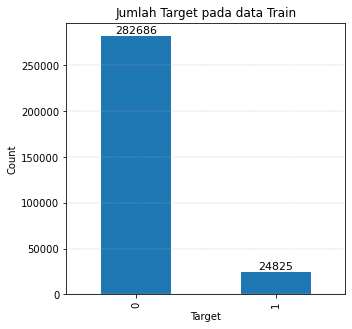

In [12]:
# visualisasi dan check TARGET 
fig,ax=plt.subplots(figsize=(5,5))

df_app_train['TARGET'].value_counts().plot(kind='bar');

for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='bottom',
                   size=11, xytext=(0,0),
                   textcoords='offset points')
ax.grid(axis = 'y',linestyle = '--', linewidth = 0.35)

plt.title('Jumlah Target pada data Train')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

* Mayoritas pelanggan tidak memiliki masalah transaksi
* Data imbalance, sehingga perlu digunakan metriks F1 Score / ROC-AUC

## D. Duplicate

In [13]:
#check duplicate train dan test

print(df_app_train.duplicated().sum())
print(df_app_test.duplicated().sum())

0
0


## E. Check Outlier

### Data continue

In [14]:
# kolom data continue
num_cols = list(df_app_train.select_dtypes(exclude='object').columns)

# filter TARGET dan FLAG
cont_cols = [col for col in num_cols if col!="TARGET" and col[:5]!='FLAG_']
print(f'Jumlah kolom dana continue = {len(cont_cols)}')

Jumlah kolom dana continue = 78


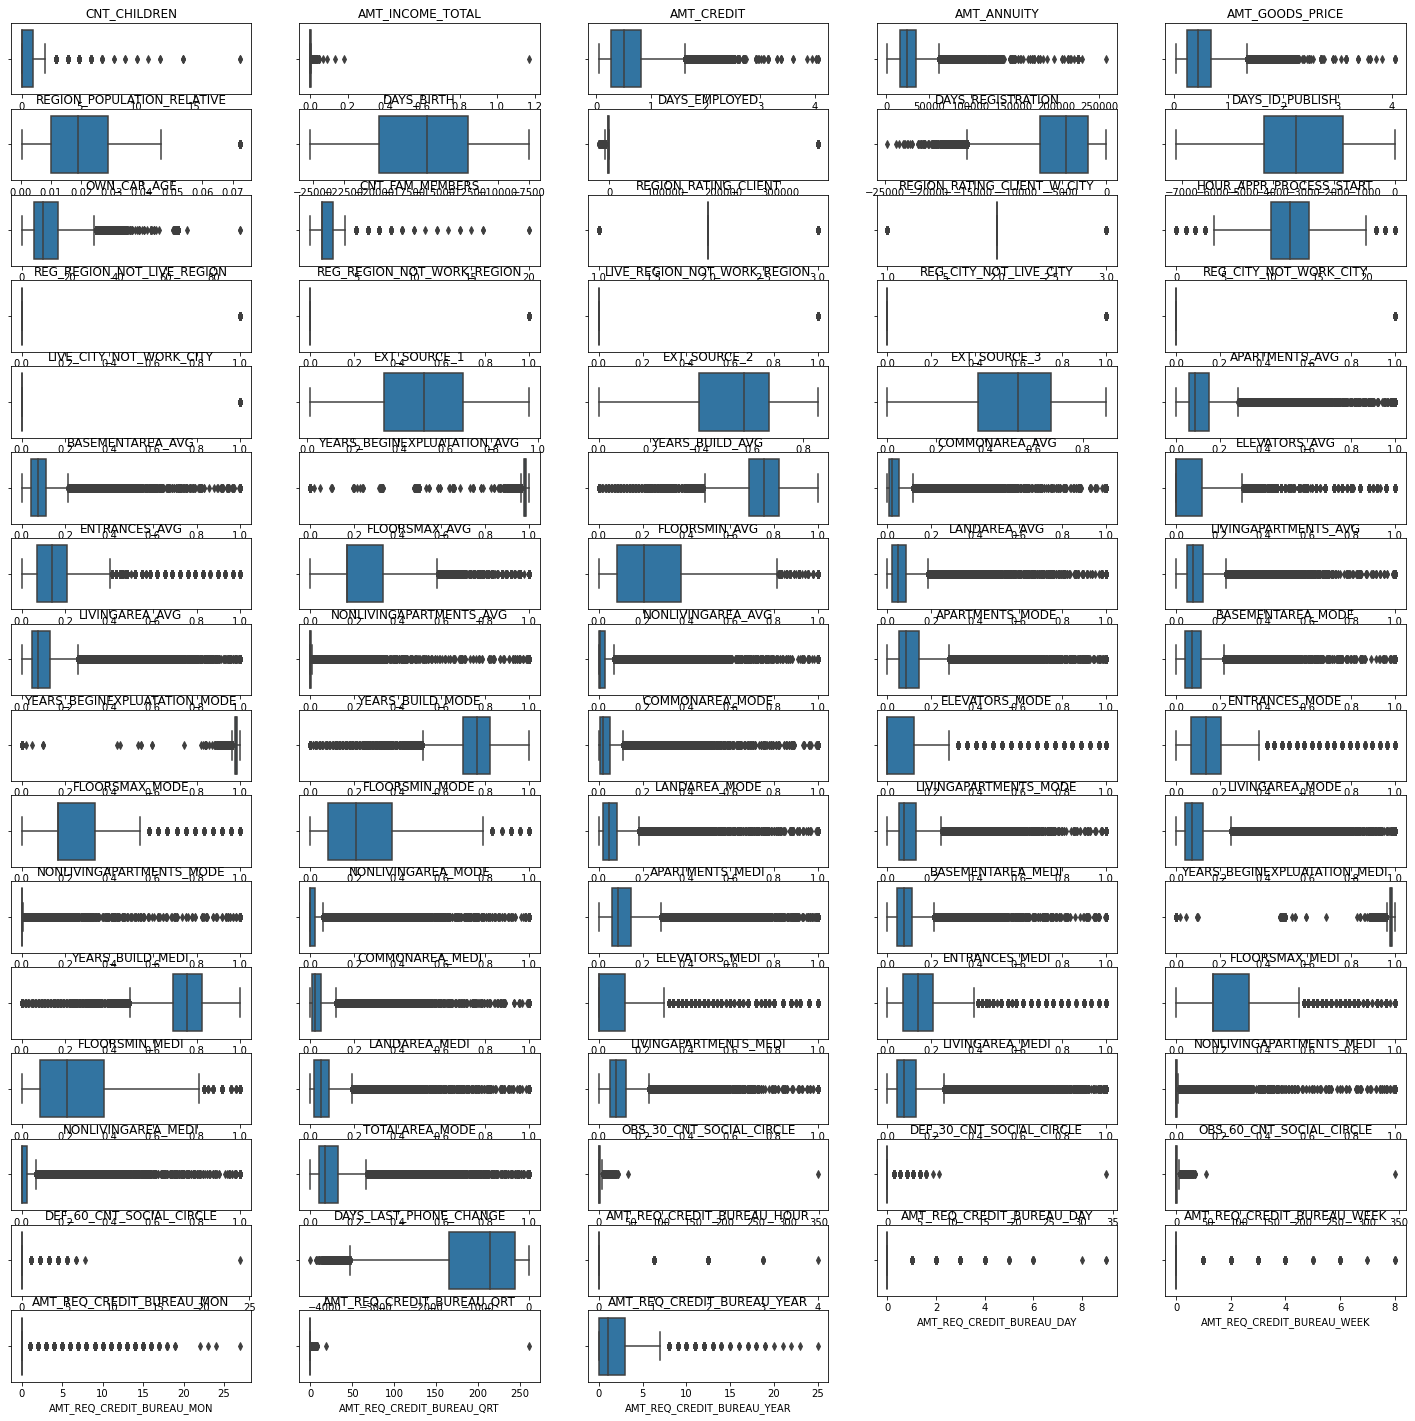

In [15]:
#visualisasi
plt.figure(figsize=(25, 25))
for i, col in enumerate(cont_cols):
    plt.subplot(16, 5, i+1)
    sns.boxplot(data=df_app_train, x=col)
    plt.title(col)

* Outlier akan dinormalisasikan karena akan menggunakan model yang rentan terhadap outlier (salah satunya adalah Linear Regression)

## F. Data Understanding

In [16]:
for i in np.linspace(0,60,4, dtype=int):
    if i == 60:
        display(df_app_train[cont_cols[i:78]].describe().transpose())
    else:
        display(df_app_train[cont_cols[i:i+20]].describe().transpose())

,count,mean,std,min,25%,50%,75%,max
CNT_CHILDREN,307511.0,0.417052,0.722121,0.00000,0.000000,0.00000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.00000,112500.000000,147150.00000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.00000,270000.000000,513531.00000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1615.50000,16524.000000,24903.00000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,40500.00000,238500.000000,450000.00000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,0.00029,0.010006,0.01885,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-25229.00000,-19682.000000,-15750.00000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-17912.00000,-2760.000000,-1213.00000,-289.000000,3.652430e+05
DAYS_REGISTRATION,307511.0,-4986.120328,3522.886321,-24672.00000,-7479.500000,-4504.00000,-2010.000000,0.000000e+00
DAYS_ID_PUBLISH,307511.0,-2994.202373,1509.450419,-7197.00000,-4299.000000,-3254.00000,-1720.000000,0.000000e+00


,count,mean,std,min,25%,50%,75%,max
LIVE_CITY_NOT_WORK_CITY,307511.0,0.179555,0.383817,0.000000e+00,0.000000,0.000000,0.000000,1.000000
EXT_SOURCE_1,134133.0,0.502130,0.211062,1.456813e-02,0.334007,0.505998,0.675053,0.962693
EXT_SOURCE_2,306851.0,0.514393,0.191060,8.173617e-08,0.392457,0.565961,0.663617,0.855000
EXT_SOURCE_3,246546.0,0.510853,0.194844,5.272652e-04,0.370650,0.535276,0.669057,0.896010
APARTMENTS_AVG,151450.0,0.117440,0.108240,0.000000e+00,0.057700,0.087600,0.148500,1.000000
BASEMENTAREA_AVG,127568.0,0.088442,0.082438,0.000000e+00,0.044200,0.076300,0.112200,1.000000
YEARS_BEGINEXPLUATATION_AVG,157504.0,0.977735,0.059223,0.000000e+00,0.976700,0.981600,0.986600,1.000000
YEARS_BUILD_AVG,103023.0,0.752471,0.113280,0.000000e+00,0.687200,0.755200,0.823200,1.000000
COMMONAREA_AVG,92646.0,0.044621,0.076036,0.000000e+00,0.007800,0.021100,0.051500,1.000000
ELEVATORS_AVG,143620.0,0.078942,0.134576,0.000000e+00,0.000000,0.000000,0.120000,1.000000


,count,mean,std,min,25%,50%,75%,max
YEARS_BEGINEXPLUATATION_MODE,157504.0,0.977065,0.064575,0.0,0.9767,0.9816,0.9866,1.0
YEARS_BUILD_MODE,103023.0,0.759637,0.110111,0.0,0.6994,0.7648,0.8236,1.0
COMMONAREA_MODE,92646.0,0.042553,0.074445,0.0,0.0072,0.0190,0.0490,1.0
ELEVATORS_MODE,143620.0,0.074490,0.132256,0.0,0.0000,0.0000,0.1208,1.0
ENTRANCES_MODE,152683.0,0.145193,0.100977,0.0,0.0690,0.1379,0.2069,1.0
FLOORSMAX_MODE,154491.0,0.222315,0.143709,0.0,0.1667,0.1667,0.3333,1.0
FLOORSMIN_MODE,98869.0,0.228058,0.161160,0.0,0.0833,0.2083,0.3750,1.0
LANDAREA_MODE,124921.0,0.064958,0.081750,0.0,0.0166,0.0458,0.0841,1.0
LIVINGAPARTMENTS_MODE,97312.0,0.105645,0.097880,0.0,0.0542,0.0771,0.1313,1.0
LIVINGAREA_MODE,153161.0,0.105975,0.111845,0.0,0.0427,0.0731,0.1252,1.0


,count,mean,std,min,25%,50%,75%,max
FLOORSMIN_MEDI,98869.0,0.231625,0.161934,0.0,0.0833,0.2083,0.3750,1.0
LANDAREA_MEDI,124921.0,0.067169,0.082167,0.0,0.0187,0.0487,0.0868,1.0
LIVINGAPARTMENTS_MEDI,97312.0,0.101954,0.093642,0.0,0.0513,0.0761,0.1231,1.0
LIVINGAREA_MEDI,153161.0,0.108607,0.112260,0.0,0.0457,0.0749,0.1303,1.0
NONLIVINGAPARTMENTS_MEDI,93997.0,0.008651,0.047415,0.0,0.0000,0.0000,0.0039,1.0
NONLIVINGAREA_MEDI,137829.0,0.028236,0.070166,0.0,0.0000,0.0031,0.0266,1.0
TOTALAREA_MODE,159080.0,0.102547,0.107462,0.0,0.0412,0.0688,0.1276,1.0
OBS_30_CNT_SOCIAL_CIRCLE,306490.0,1.422245,2.400989,0.0,0.0000,0.0000,2.0000,348.0
DEF_30_CNT_SOCIAL_CIRCLE,306490.0,0.143421,0.446698,0.0,0.0000,0.0000,0.0000,34.0
OBS_60_CNT_SOCIAL_CIRCLE,306490.0,1.405292,2.379803,0.0,0.0000,0.0000,2.0000,344.0


### Korelasi

In [17]:
# korelasi
korelasi = df_app_train.corr()['TARGET'].sort_values()

print('Most Positive Correlations: \n', korelasi.tail(15))
print('\nMost Negative Correlations: \n', korelasi.head(15))

Most Positive Correlations: 
 DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations: 
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.03964

* Feature yang memiliki korelasi positif tertinggi adalah DAYS_BIRTH, REGION_RATING_CLIENT_W_CITY, REGION_RATING CLIENT

* Feature yang memiliki korelasi negatif tertinggi adalah EXT_SOURCE_3, EXT_SOURCE_2, EXT_SOURCE_1

### 1. Check lama bekerja

In [18]:
#Days Birth
display((df_app_train['DAYS_BIRTH']/-365).describe())
print('\n')
#Days Employed
display(df_app_train['DAYS_EMPLOYED'].describe())

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Text(0.5, 0, 'Days Employment')

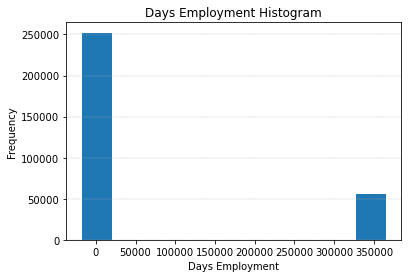

In [19]:
df_app_train['DAYS_EMPLOYED'].plot.hist(title='Days Employment Histogram')
plt.grid(axis = 'y',linestyle = '--', linewidth = 0.35)
plt.xlabel('Days Employment')

* Dapat dilihat bahwa 3.652430 merupakan suatu outlier (berdasarkan nilai Max kolom)

In [20]:
#Check persentase data yang termasuk outlier

value_percnt = len(df_app_train[df_app_train['DAYS_EMPLOYED']==365243])/len(df_app_train) * 100
print('Outlier tedapat di {:.2f}% dari semua data'.format(value_percnt))

Outlier tedapat di 18.01% dari semua data


* Data dapat diisi dengan nilai median

### 2.Pengaruh usia terhadap kemampuan membayar loan

In [21]:
#korelasi terhadap TARGET
df_app_train['DAYS_BIRTH']=abs(df_app_train['DAYS_BIRTH'])
df_app_train['DAYS_BIRTH'].corr(df_app_train['TARGET'])

-0.07823930830984513

* Korelasi negatif menunjukkan semakin tua usia, maka kemungkinan untuk melunas loan lebih tinggi

Text(0, 0.5, 'Jumlah')

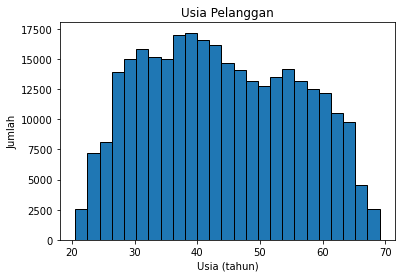

In [22]:
#Check distribusi usia data

plt.hist(df_app_train['DAYS_BIRTH']/365, edgecolor='k',bins=25)
plt.title('Usia Pelanggan')
plt.xlabel('Usia (tahun)')
plt.ylabel('Jumlah')

#### 2.1.Pembagian kelompok usia yang gagal bayar

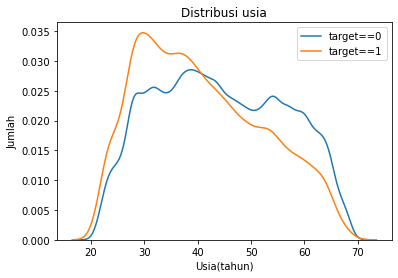

In [23]:
plt.figure(figsize=(6,4))

# Mampu melunas 
sns.kdeplot(df_app_train.loc[df_app_train['TARGET']==0,'DAYS_BIRTH']/365,label='target==0')

# Tidak mampu melunas
sns.kdeplot(df_app_train.loc[df_app_train['TARGET']==1,'DAYS_BIRTH']/365,label='target==1')

plt.xlabel('Usia(tahun)')
plt.ylabel('Jumlah');
plt.title('Distribusi usia')
plt.legend()

* Dapat dilihat bahwa semakin tua, semakin mampu membayar loan

* Range usia di atas 55 tahun memiliki kecenderungan lebih dapat melunaskan loan dibanding kelompok usia lainnya, namun tidak menutup kemungkinan usia di bawahnya tidak mampu melunaskan

* Feature ini memiliki pengaruh terhadap TARGET, maka dapat dipertimbangkan sebagai metriks

### 3. Jenis kontrak 

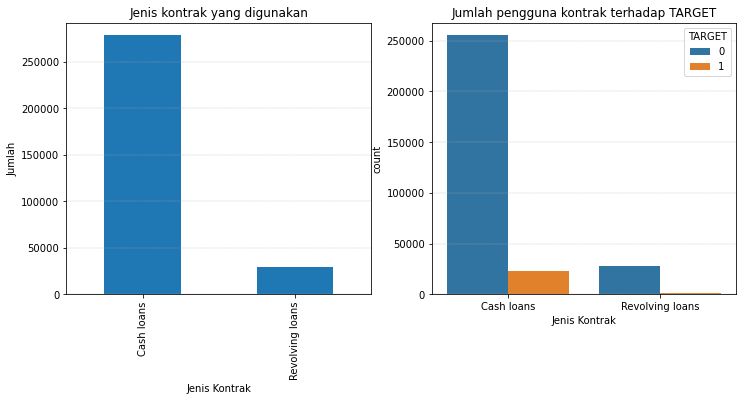

In [24]:
#Jumlah pengguna jenis kontrak tertentu
fig,ax= plt.subplots(1,2,figsize=(12,5))
ax1= df_app_train['NAME_CONTRACT_TYPE'].value_counts().plot(kind='bar', title='Jenis kontrak yang digunakan', ax=ax[0])
ax1.set_xlabel('Jenis Kontrak')
ax1.set_ylabel('Jumlah')
ax1.grid(axis = 'y',linestyle = '--', linewidth = 0.35)

sns.countplot(data= df_app_train, x='NAME_CONTRACT_TYPE', hue='TARGET')
plt.grid(axis = 'y',linestyle = '--', linewidth = 0.35)
plt.title('Jumlah pengguna kontrak terhadap TARGET')
plt.xlabel('Jenis Kontrak')
plt.show()

* Pengguna Cash Loans lebih diminati dibandingkan metode lain

* Jenis kontrak tidak memiliki pengaruh terhadap TARGET yang ditandai dengan rendahnya TARGET =1 yang terpengaruhi

In [25]:
#pembuatan kelompok usia dengan interval 5 tahun
np.linspace(20,70,num=11)

array([20., 25., 30., 35., 40., 45., 50., 55., 60., 65., 70.])

In [26]:
df_usia= df_app_train[['TARGET','DAYS_BIRTH']]
df_usia['YEARS_BIRTH']= df_usia['DAYS_BIRTH']/365

# Pengelompokan
df_usia['YEARS_BINNED']=pd.cut(df_usia['YEARS_BIRTH'],bins=np.linspace(20,70,num=11))
df_usia.reset_index(drop=True).head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [27]:
grup_usia= df_usia.groupby('YEARS_BINNED').mean()
grup_usia

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


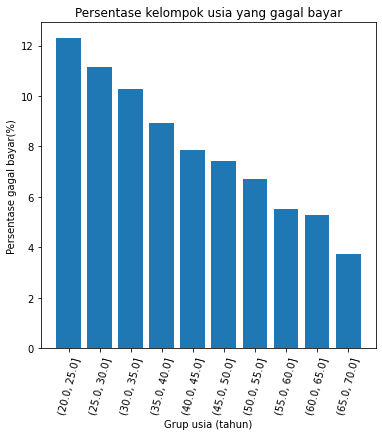

In [28]:
#visualisasi
plt.figure(figsize=(6,6))

plt.bar(grup_usia.index.astype(str), 100*grup_usia['TARGET'])

plt.xticks(rotation=75);
plt.xlabel('Grup usia (tahun)');
plt.ylabel('Persentase gagal bayar(%)')
plt.title('Persentase kelompok usia yang gagal bayar');

* Kelompok usia 20-35 memiliki persentase yang lebih tinggi (di atas 10%) untuk gagal dalam melakukan pembayaran

### 4. Korelasi data EXT (eksternal)

In [29]:
# Berdasarkan uji korelasi, terdapat beberapa feature yang memiliki korelasi yang cukup tinggi

ext_data=df_app_train[['TARGET','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH']]
ext_data_corrs=ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


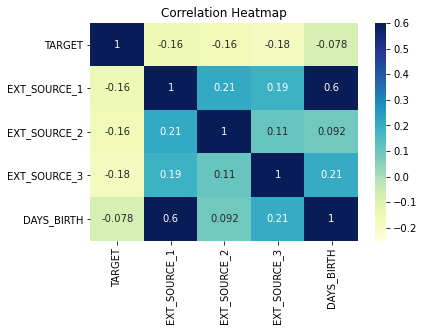

In [30]:
plt.figure(figsize=(6,4))

sns.heatmap(ext_data_corrs, cmap="YlGnBu", vmin=-0.25, annot=True, vmax=0.6)
plt.title('Correlation Heatmap');

* Korelasi negatif TARGET dengan data EXT menandakan adanya peningkatan pembayaran ketika nilai EXT meningkat

* EXT_SOURCE_1 memiliki korelasi positif yang tinggi dengan DAYS_BIRTH, yang dapat menandakan EXT_SOURCE_1 mengandung data pada DAYS_BIRTH

### 5. Pengaruh jenis kelamin terhadap jumlah peminjaman

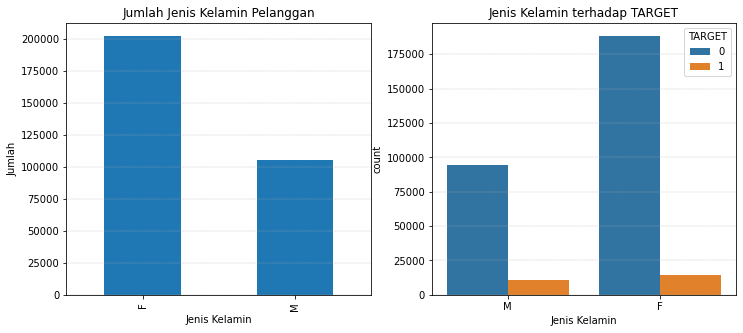

In [31]:
#Jumlah jenis kelamin pelanggan
fig,ax= plt.subplots(1,2,figsize=(12,5))
ax1= df_app_train[df_app_train['CODE_GENDER']!='XNA']['CODE_GENDER'].value_counts().plot(kind='bar', title='Jumlah Jenis Kelamin Pelanggan', ax=ax[0])
ax1.set_xlabel('Jenis Kelamin')
ax1.set_ylabel('Jumlah')
ax1.grid(axis = 'y',linestyle = '--', linewidth = 0.35)

sns.countplot(data=df_app_train[df_app_train['CODE_GENDER']!='XNA'], x='CODE_GENDER', hue='TARGET')
plt.title('Jenis Kelamin terhadap TARGET')
plt.xlabel('Jenis Kelamin')
plt.grid(axis = 'y',linestyle = '--', linewidth = 0.35)
plt.show()

* Pelanggan wanita lebih sering menggunakan jasa kita dalam melakukan peminjaman

* Kedua jenis kelamin memiliki nilai yang tidak berbeda jauh, yang menandakan tidak ada pengaruh antara jenis kelamin terhadap TARGET

### 6. Pengaruh kepemilikan mobil dan properti terhadap TARGET

In [32]:
df_app_train[df_app_train['TARGET']==0].groupby(['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']).count()['TARGET']

FLAG_OWN_CAR  FLAG_OWN_REALTY
N             N                   56400
              Y                  129275
Y             N                   29957
              Y                   67054
Name: TARGET, dtype: int64

In [33]:
df_app_train[df_app_train['TARGET']==1].groupby(['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']).count()['TARGET']

FLAG_OWN_CAR  FLAG_OWN_REALTY
N             N                   5572
              Y                  11677
Y             N                   2270
              Y                   5306
Name: TARGET, dtype: int64

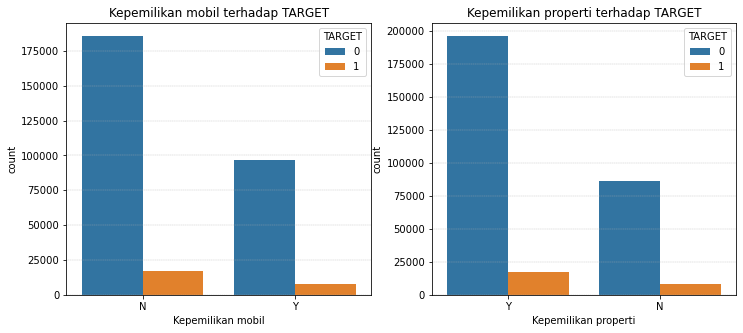

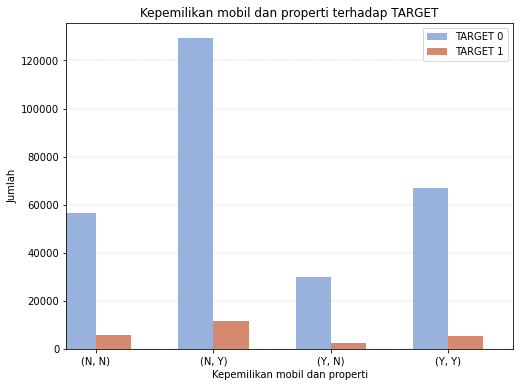

In [34]:
# Kepemilikan mobil atau properti
fig,ax= plt.subplots(1,2,figsize=(12,5))
ax1= sns.countplot(data=df_app_train, x='FLAG_OWN_CAR', hue='TARGET', ax=ax[0])
ax1.grid(axis = 'y',linestyle = '--', linewidth = 0.35)
ax1.set_title('Kepemilikan mobil terhadap TARGET')
ax1.set_xlabel('Kepemilikan mobil')

ax2=sns.countplot(data=df_app_train, x='FLAG_OWN_REALTY', hue='TARGET',ax =ax[1])
ax2.grid(axis = 'y',linestyle = '--', linewidth = 0.35)
ax2.set_title('Kepemilikan properti terhadap TARGET')
ax2.set_xlabel('Kepemilikan properti')


# Kepemilikan mobil dan properti
plt.figure(figsize=(8,6))
df_app_train[df_app_train['TARGET']==0].groupby(['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']).count()['TARGET'].plot(kind='bar', color='#99B2DD', width=0.3,  position=1, label='TARGET 0')
df_app_train[df_app_train['TARGET']==1].groupby(['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']).count()['TARGET'].plot(kind='bar', color='#D5896F', width=0.3,  position=0, label='TARGET 1')
plt.title('Kepemilikan mobil dan properti terhadap TARGET')
plt.ylabel('Jumlah')
plt.xlabel('Kepemilikan mobil dan properti')
plt.grid(axis = 'y',linestyle = '--', linewidth = 0.35)
plt.xticks(rotation=0)
plt.legend()

* Lebih banyak pelanggan yang tidak memiliki mobil, namun memiliki properti

* Pelanggan yang memiliki hanya mobil saja memiliki kemampuan bayar yang paling rendah dibandingkan dengan kelompok lain

* Pelanggan yang memiliki mobil dan properti mampu membayar lebih baik dibandingkan dengan pelanggan yang tidak memiliki keduanya

### 7. Jenis dan pengaruh jumlah income terhadap kemampuan membayar (TARGET)

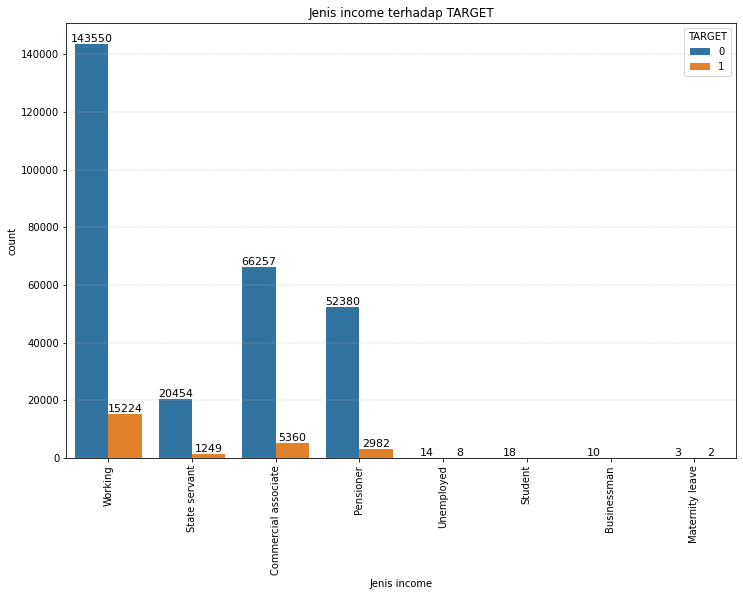

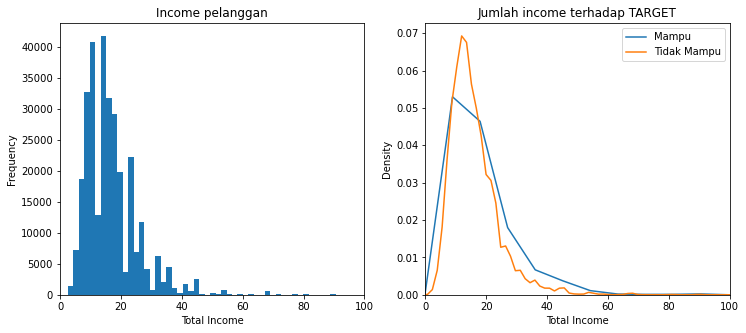

In [35]:
#jenis income
fig,ax= plt.subplots(figsize=(12,8))
ax = sns.countplot(data=df_app_train, x='NAME_INCOME_TYPE', hue='TARGET')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='bottom',
                   size=11, xytext=(0,0),
                   textcoords='offset points')
ax.grid(axis = 'y',linestyle = '--', linewidth = 0.35)

plt.title('Jenis income terhadap TARGET')
plt.xlabel('Jenis income')
plt.show()

#--------------------------------------------------

#Jumlah income
fig,ax= plt.subplots(1,2,figsize=(12,5))
df_income = df_app_train[df_app_train['AMT_INCOME_TOTAL']!=117000000.0]  #117000000 adalah outlier
df_income['AMT_INCOME_TOTAL'] = df_income['AMT_INCOME_TOTAL']/10000 #mengurangi jumlah 0 untuk memudahkan pembacaan
ax1= df_income['AMT_INCOME_TOTAL'].plot(kind='hist', bins=1000, title='Income pelanggan', ax=ax[0]);
ax1.set_xlabel('Total Income')
ax1.set_xlim([0,100])

#Jumlah income terhadap TARGET
sns.distplot(df_income[df_income['TARGET']==0]['AMT_INCOME_TOTAL'], hist=False, bins=1000, label='Mampu');
sns.distplot(df_income[df_income['TARGET']==1]['AMT_INCOME_TOTAL'], hist=False, bins=1000, label='Tidak Mampu');
plt.title('Jumlah income terhadap TARGET')
plt.xlabel('Total Income')
plt.xlim([0,100])
plt.legend()
plt.show()

* Student dan beberapa businessmen melakukan peminjaman dengan jumlah sedikit, namun mereka mampu membayarnya

* Kelompok pekerja melakukan jasa peminjaman yang paling banyak dan mampu membayar loan

* Pelanggan dengan income yang rendah memiliki kecenderungan untuk apply loan yang lebih tinggi

* Kelompok pelanggan dengan income kisaran 10-20 M memiliki kecenderungan untuk tidak mampu membayar, sedangkan kelompok income 23-60 M mampu membayar

# Data Pre-processing

## Backup data

In [36]:
#backup data

df_train_cpy= df_app_train.copy()
df_test_cpy= df_app_test.copy()

### Remove XNA

In [37]:
df_app_train= df_app_train[df_app_train['CODE_GENDER']!='XNA']

# check
df_app_train['CODE_GENDER'].value_counts()

F    202448
M    105059
Name: CODE_GENDER, dtype: int64

### Remove outlier pada data income

In [38]:
df_app_train = df_app_train[df_app_train['AMT_INCOME_TOTAL'] != 117000000.0]

### Remove NaN

In [39]:
#Pemilihan kolom dengan data mengandung NaN di atas 40%
hapus_col = nan_df_train[nan_df_train['% NaN']>40]['Column'].tolist()
simpan_col = [col for col in df_app_train.columns if col not in hapus_col]

#Pengambilan kolom yang sudah difilter
df_app_train= df_app_train[simpan_col]

# Membuang TARGET dan mengambil kolom yang sudah difilter untuk data test
simpan_col.remove('TARGET')
df_app_test = df_app_test[simpan_col]

#### Split data

In [40]:
X = df_app_train.drop('TARGET', axis=1)
y = df_app_train['TARGET']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Fill NaN

In [42]:
#group data type (train)
cat= []
num= []

for col in X_train.columns:
    if df_app_train[col].dtype ==  'O':
        cat.append(col)
    else:
        num.append(col)

In [43]:
# isi NaN kategorikal dengan nilai modus, dan NaN numerikal dengan nilai median (train)

for col in cat:
    X_train[col] = X_train[col].fillna(X_train[col].mode()[0])

for col in num:
    X_train[col] = X_train[col].fillna(X_train[col].median())

#-------------------------------------------------------------------------------------------
    
# isi NaN kategorikal dengan nilai modus, dan NaN numerikal dengan nilai median (test)

for col in cat:
    X_test[col] = X_test[col].fillna(X_test[col].mode()[0])

for col in num:
    X_test[col] = X_test[col].fillna(X_test[col].median())

### MinMax (Normalisasi) (dapat mengubah outlier menjadi range/ skala yang serupa)

In [44]:
#make_pipeline
nums_= make_pipeline(MinMaxScaler())

### Feature Engineering (OneHot-Encoding)

In [45]:
#make_pipeline
cat_= make_pipeline(OneHotEncoder(handle_unknown='ignore', drop='first'))

In [46]:
#Aplikasikan ke kolom dengan tipe data(dtypes) tertentu
preprocessor = ColumnTransformer(remainder='passthrough',
    transformers=[
        ("num", nums_, make_column_selector(dtype_exclude="object")),
        ("cat", cat_, make_column_selector(dtype_include="object")),
    ]
)

# Modeling

* Karena target sangat imbalance (91:9), maka perlakuan yang akan dilakukan adalah melakukan oversampling 9dengan SMOTE) lalu akan di-undersampling lagi(untuk mengurangi sampel yang terlalu redundant atau salah).

In [47]:
over_ = SMOTE(sampling_strategy=0.25,random_state=42)                     # 1/4 data Feature
under_ = RandomUnderSampler(sampling_strategy=0.75, random_state=42)       # 3/4 data Target/ Label

In [48]:
#Evaluasi MAE, RMSE, R^2
def eval_regression(model, pred, xtrain, ytrain, xtest, ytest):
    print("MAE: %.2f" % mean_absolute_error(ytest, pred)) # The MAE
    print("RMSE: %.2f" % mean_squared_error(ytest, pred, squared=False)) # The RMSE
    print('R2 score: %.2f' % r2_score(ytest, pred)) # Explained variance score: 1 is perfect prediction

In [49]:
#Evaluasi ROC AUC
def evaluate_model(model_pipeline):
    # prediction
    train_pred = model_pipeline.predict(X_train)
    test_pred = model_pipeline.predict(X_test)
    
    train_pred_proba = model_pipeline.predict_proba(X_train)
    test_pred_proba = model_pipeline.predict_proba(X_test)
    
    # evaluations
    print('Nilai ROC AUC data Train dan Test \n')
    print('Nilai ROC AUC Train= {:.4f}'.format(roc_auc_score(y_train, train_pred_proba[:, 1])))
    print('Nilai ROC AUC Test= {:.4f}'.format(roc_auc_score(y_test, test_pred_proba[:, 1])))
    print('')
    print('Confusion Matrix:')
    print('Training :\n', confusion_matrix(y_train, train_pred))
    print('Validation :\n', confusion_matrix(y_test, test_pred))

## Initial (dengan kolom yang sudah difilter)

### Linear Regression

In [50]:
#model dan pipeline
regressor = LinearRegression()
reg_pipeline1= make_pipeline(preprocessor, over_, under_, regressor)
reg_pipeline1.fit(X_train, y_train)

#train model
pred = reg_pipeline1.predict(X_test)

#evaluasi model
eval_regression(reg_pipeline1, pred, X_train, y_train, X_test, y_test)

MAE: 0.36
RMSE: 0.41
R2 score: -1.26


### Logistic Regression

In [51]:
#model dan pipeline
log_reg= LogisticRegression()
log_reg_pipeline1= make_pipeline(preprocessor, over_, under_, log_reg)
log_reg_pipeline1.fit(X_train, y_train)

#train model
pred = log_reg_pipeline1.predict(X_test)

#evaluasi model
eval_regression(log_reg_pipeline1, pred, X_train, y_train, X_test, y_test)

MAE: 0.24
RMSE: 0.49
R2 score: -2.19


* Nilai R2 lebih dari 1 menandakan model ini sangat underfit terhadap data test

* Nilai R2 yang negatif menandakan model menghasilkan perkiraan yang berbanding terbalik, yang memiliki arti mengurangi Target, yang bukan tujuan kita

* Hal ini dapat disebabkan karena target kita merupakan data yang tergolong kategorikal, maka kurang tepat

* Oleh karena itu, model Regression tidak cocok untuk digunakan

### Random Forest

In [52]:
# create pipeline
rf = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=42)
rf_pipeline2 = make_pipeline(preprocessor, over_, under_, rf)

# train 
rf_pipeline2.fit(X_train, y_train)

# evaluate
evaluate_model(rf_pipeline2)

Nilai ROC AUC data Train dan Test 

Nilai ROC AUC Train= 0.9965
Nilai ROC AUC Test= 0.7242

Confusion Matrix:
Training :
 [[219496   6668]
 [   416  19424]]
Validation :
 [[54070  2448]
 [ 4087   897]]


* Model sangat underfit, ditandai dengan nilai ROC AUC train yang terlalu bagus dibandingkan ROC AUC test

### ADA Boost

In [53]:
# create pipeline
adaboost = AdaBoostClassifier(n_estimators=200, random_state=42)
ada_pipeline3 = make_pipeline(preprocessor, over_, under_, adaboost)

# train 
ada_pipeline3.fit(X_train, y_train)

# evaluate
evaluate_model(ada_pipeline3)

Nilai ROC AUC data Train dan Test 

Nilai ROC AUC Train= 0.7313
Nilai ROC AUC Test= 0.7255

Confusion Matrix:
Training :
 [[209788  16376]
 [ 14493   5347]]
Validation :
 [[52486  4032]
 [ 3641  1343]]


* Hasil model ini cukup baik, yang dapat dipertimbangkan

### XGBoost

In [54]:
# create pipeline
xgboost = XGBClassifier(random_state=42)
xgb_pipeline4 = make_pipeline(preprocessor, over_, under_, xgboost)

# train 
xgb_pipeline4.fit(X_train, y_train)

# evaluate
evaluate_model(xgb_pipeline4)

[17:06:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Nilai ROC AUC data Train dan Test 

Nilai ROC AUC Train= 0.8183
Nilai ROC AUC Test= 0.7409

Confusion Matrix:
Training :
 [[216801   9363]
 [ 13955   5885]]
Validation :
 [[53831  2687]
 [ 3865  1119]]


* Model ini sedikit underfit, namun nilainya yang paling baik dari semua model. Berikut akan dicoba untuk tingkatkan nilai ROC AUC dengan feaeture engineering

## Tambah feature

In [55]:
#Perlakuan feature engineering berupa penambahan kolom baru yang berisi nilai eksponesial dari feature dengan korelasi tertinggi

cols = ['DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT',
       'EXT_SOURCE_3', 'EXT_SOURCE_2', 'DAYS_EMPLOYED']

for col in cols:
    for i in [2,3]:
        X_train[f'{col}_power_{i}'] = X_train[col] ** i
        X_test[f'{col}_power_{i}'] = X_test[col] ** i
        df_app_test[f'{col}_power_{i}'] = df_app_test[col] ** i

### Random Forest

In [56]:
# create pipeline
rf2 = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=42)
rf2_pipeline5 = make_pipeline(preprocessor, over_, under_, rf2)

# train 
rf2_pipeline5.fit(X_train, y_train)

# evaluate
evaluate_model(rf2_pipeline5)

Nilai ROC AUC data Train dan Test 

Nilai ROC AUC Train= 0.9958
Nilai ROC AUC Test= 0.7243

Confusion Matrix:
Training :
 [[215523  10641]
 [   201  19639]]
Validation :
 [[52589  3929]
 [ 3691  1293]]


* Tidak banyak perubahan nilai ROC AUC, dan data masih sangat underfit,

* Ada sedikit penurunan False Negative, peningkatan True Negative, namun terjadi peningkatan False Positive 

### ADA Boost

In [57]:
# create pipeline
adaboost2 = AdaBoostClassifier(n_estimators=200, random_state=42)
ada2_pipeline6 = make_pipeline(preprocessor, over_, under_, adaboost2)

# train 
ada2_pipeline6.fit(X_train, y_train)

# evaluate
evaluate_model(ada2_pipeline6)

Nilai ROC AUC data Train dan Test 

Nilai ROC AUC Train= 0.7328
Nilai ROC AUC Test= 0.7257

Confusion Matrix:
Training :
 [[210723  15441]
 [ 14586   5254]]
Validation :
 [[52637  3881]
 [ 3691  1293]]


* Tidak banyak perubahan nilai ROC AUC dari sebelumnya

* False dan True Negative mengalami penurunan, True dan False Positive mengalami peningkatan

### XGBoost

In [58]:
# create pipeline
xgboost2 = XGBClassifier(random_state=42)
xgb2_pipeline7 = make_pipeline(preprocessor, over_, under_, xgboost2)

# train 
xgb2_pipeline7.fit(X_train, y_train)

# evaluate
evaluate_model(xgb2_pipeline7)

[17:16:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Nilai ROC AUC data Train dan Test 

Nilai ROC AUC Train= 0.8149
Nilai ROC AUC Test= 0.7419

Confusion Matrix:
Training :
 [[217242   8922]
 [ 14137   5703]]
Validation :
 [[53921  2597]
 [ 3890  1094]]


* Tidak banyak perubahan nilai ROC AUC, dan data masih sedikit underfit

* Karena tidak ada perubahan yang signifikan, maka akan dicoba kembali menggunakan dataframe awal

## Dataframe awal

In [59]:
df_app_train= df_train_cpy
df_app_test= df_test_cpy

In [60]:
# data pre-processing


#remove XNA
df_app_train= df_app_train[df_app_train['CODE_GENDER']!='XNA']

#------------------------------------------------

#split
X = df_app_train.drop('TARGET', axis=1)
y = df_app_train['TARGET']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#--------------------------------------------------

#fill NaN

#group data type (train)
cat= []
num= []

for col in X_train.columns:
    if df_app_train[col].dtype ==  'O':
        cat.append(col)
    else:
        num.append(col)

# isi NaN kategorikal dengan nilai modus, dan NaN numerikal dengan nilai median (train)

for col in cat:
    X_train[col] = X_train[col].fillna(X_train[col].mode()[0])

for col in num:
    X_train[col] = X_train[col].fillna(X_train[col].median())

    
# isi NaN kategorikal dengan nilai modus, dan NaN numerikal dengan nilai median (test)

for col in cat:
    X_test[col] = X_test[col].fillna(X_test[col].mode()[0])

for col in num:
    X_test[col] = X_test[col].fillna(X_test[col].median())
#--------------------------------------------------

#Perlakuan feature engineering berupa penambahan kolom baru yang berisi nilai eksponesial dari feature dengan korelasi tertinggi

cols = ['DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT',
       'EXT_SOURCE_3', 'EXT_SOURCE_2', 'DAYS_EMPLOYED']

for col in cols:
    for i in [2,3]:
        X_train[f'{col}_power_{i}'] = X_train[col] ** i
        X_test[f'{col}_power_{i}'] = X_test[col] ** i
        df_app_test[f'{col}_power_{i}'] = df_app_test[col] ** i


### Random Forest

In [61]:
# create pipeline
rf3 = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=42)
rf3_pipeline8 = make_pipeline(preprocessor, over_, under_, rf3)

# train 
rf3_pipeline8.fit(X_train, y_train)

# evaluate
evaluate_model(rf3_pipeline8)

Nilai ROC AUC data Train dan Test 

Nilai ROC AUC Train= 0.9912
Nilai ROC AUC Test= 0.7242

Confusion Matrix:
Training :
 [[215252  10949]
 [   860  18944]]
Validation :
 [[51261  5220]
 [ 3474  1547]]


* Tidak banyak perubahan nilai ROC AUC, dan data masih sangat underfit

### ADA Boost

In [62]:
# create pipeline
adaboost3 = AdaBoostClassifier(n_estimators=200, random_state=42)
ada3_pipeline9 = make_pipeline(preprocessor, over_, under_, adaboost3)

# train 
ada3_pipeline9.fit(X_train, y_train)

# evaluate
evaluate_model(ada3_pipeline9)

Nilai ROC AUC data Train dan Test 

Nilai ROC AUC Train= 0.7314
Nilai ROC AUC Test= 0.7261

Confusion Matrix:
Training :
 [[210335  15866]
 [ 14576   5228]]
Validation :
 [[48533  7948]
 [ 2911  2110]]


* Tidak banyak perubahan nilai ROC AUC dari sebelumnya

### XGBoost

In [63]:
# create pipeline
xgboost3 = XGBClassifier(random_state=42)
xgb3_pipeline10 = make_pipeline(preprocessor, over_, under_, xgboost3)

# train 
xgb3_pipeline10.fit(X_train, y_train)

# evaluate
evaluate_model(xgb3_pipeline10)

[17:29:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Nilai ROC AUC data Train dan Test 

Nilai ROC AUC Train= 0.8253
Nilai ROC AUC Test= 0.7444

Confusion Matrix:
Training :
 [[216744   9457]
 [ 13596   6208]]
Validation :
 [[53420  3061]
 [ 3725  1296]]


* Walupun model ini sedikit underfit, namun model ini menghasilkan nilai ROC AUC yang paling bagus, oleh karena itu model ini akan digunakan

# Prediction

In [64]:
pd.DataFrame({'SK_ID_CURR': df_app_test.index,'TARGET': xgb3_pipeline10.predict_proba(df_app_test)[:,1]}).to_csv('Hasil prediksi.csv', index=False)